## 神经网络入门

- 神经网络的核心组件
- Keras简介
- 使用神经网络解决基本的分类和回归问题

训练神经网络主要由以下几个部分组成：

- 层（layer），多个层组合成网络（即模型）
- 输入数据和相应的目标
- 损失函数（loss function）
- 优化器（optimizer）

### 层：深度学习的基础组件

层是一个数据处理模块，将一个或多个输入张量转换为一个或多个输出张量。有一些层是没有状态的，但大多数的层是有状态的，即层的权重，也即是层的参数。

不同的张量格式和不同的数据类型需要用到不同的层：

1. 简单的2D向量数据（samples, features），通常用密集层（densely connected layer）,也叫全连接层（fully connected layer）或密集层（dense layer），对应于Keras中的`Dense`类

2. 序列数据（samples, timesteps, features），通常用循环层（recurrent layer，对应于Keras中的`LSTM` 层）来处理

3. 图像数据保存于4D张量中，通常用二维卷积层（Keras中的`Conv2D`）来处理

In [1]:
from keras import models
from keras import layers

model = models.Sequential()
# 有32个输出单元的密集层
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32)) #这里没有input_shape参数，keras可以自动推导其需要的输入形状

/home/pzhang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


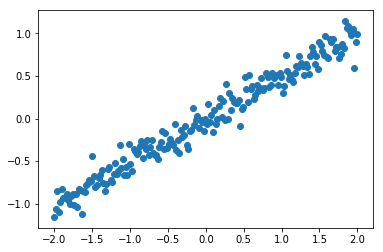

In [2]:
# 一个简单的线性回归例子
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(-2, 2, 200).reshape(-1, 1)
np.random.shuffle(X)
y = 0.5*X + np.random.normal(0, 0.1, (200, )).reshape(-1, 1)

plt.scatter(X, y)
plt.show()

In [3]:
X_train, X_test = X[:140], X[140:]
y_train, y_test = y[:140], y[140:]

model = models.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(X_train.shape[1],)))
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
#
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
140/140 [==============================] - 1s 4ms/step - loss: 0.0707 - mean_absolute_error: 0.1843
Epoch 2/5
140/140 [==============================] - 0s 811us/step - loss: 0.0121 - mean_absolute_error: 0.0860
Epoch 3/5
140/140 [==============================] - 0s 750us/step - loss: 0.0119 - mean_absolute_error: 0.0849
Epoch 4/5
140/140 [==============================] - 0s 805us/step - loss: 0.0119 - mean_absolute_error: 0.0843
Epoch 5/5
140/140 [==============================] - 0s 770us/step - loss: 0.0120 - mean_absolute_error: 0.0860


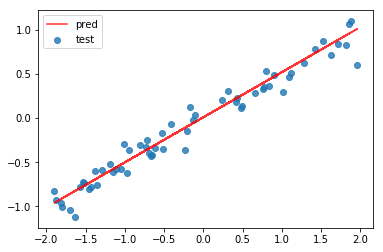

In [6]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, label="test", alpha=0.8)
plt.plot(X_test, y_pred, color='r',label='pred', alpha=0.8)
plt.legend(loc='best')

plt.show()

### 模型： 层构成的网络

深度学习模型是层构成的有向无环图。最常见的例子就是层的线性堆叠。

除此之外，还有更多类型的网络拓扑结构

- two-branch
- multihead
- Inception
- 。。。

### 损失函数和优化器：配置学习过程的关键

一旦确定了网络结构，还需要以下两个参数

- 损失函数

- 优化器

一般可以遵循以下原则来选择损失函数

1. 二分类问题： 二元交叉熵（binary crossentropy）
2. 多分类问题：分类交叉熵（categorical crossentropy）
3. 回归问题：均方误差（mean-squared error）
4. 序列学习问题：联结主义时序分类（CTC，connectionist temporal classification）

### 电影评论分类：二分类问题

IMDB数据集：来自IMDB的50000条严重两极分化的评论，数据被分为用于训练的25000评论和25000条用于测试的25000条评论，训练集和测试集均包含50%的正面评价和50%的负面评价。

In [7]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

`num_words=10000` 表示仅保留训练数据中前10000个最常出现的单词。

`train_data` 和 `test_data` 是评论组成的列表，每条评论是由单词索引组成的列表；`train_labels` 和 `test_labels`都是由0和1组成的列表，0代表负面，1表示正面

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_labels[0]

1

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
(value, key) for (key, value) in word_index.items()
)

decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### 准备数据

不能讲整数序列直接输入到神经网络中，需要对其进行转换。

这里采用one-hot编码方式。每个样本都被转换为长度为10000的向量

In [12]:
# one-hot
import numpy as np

def vectorize_sequences(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 构建网络

该例中，输入是向量，输出是0或1。这是最简单的情况。通常带`relu`激活的全连接层的简单堆叠。

In [16]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],) ))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

这是一个二分类问题，所以采用`binary_crossentropy`损失函数。

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=0.001),
    metrics=['accuracy'])

#### 验证方法

先留出验证集

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
# 训练模型
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_acc

返回的`history`中包含有训练和验证集上的损失和精度

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

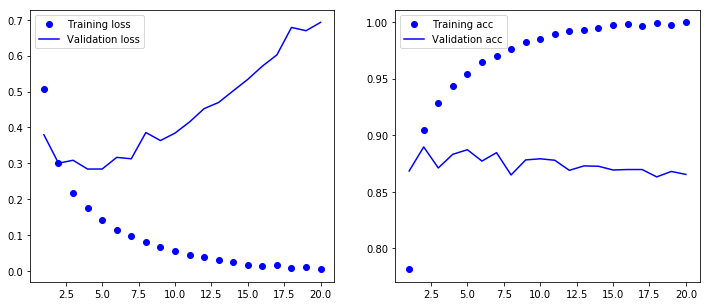

In [21]:
# 损失和精度曲线
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epoches = np.arange(len(loss)) + 1

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(epoches, loss, 'bo', label='Training loss')
axes[0].plot(epoches, val_loss, color='b', label='Validation loss')
axes[1].plot(epoches, acc, 'bo', label='Training acc')
axes[1].plot(epoches, val_acc, color='b', label='Validation acc')

axes[0].legend(loc='best')
axes[1].legend(loc='best')

plt.show()

从图中可以看出，每一轮的训练损失都在降低，训练精度每轮都在提升。但在验证集上确并非如此。模型**过拟合**了。

验证集在第4轮过后损失就达到了最小， 因此我们可以在第4轮后就停止训练。

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 44us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 38us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 62us/step


In [23]:
result

[0.3231545869159698, 0.87348]

如你所见，通过这种简单的方法，我们在测试集上得到了88%的精度。

#### 进一步实验

- 尝试三个或更多的隐藏层
- 尝试使用更多的隐藏单元
- 尝试使用`mse`损失代替`binary_crossentropy`
- 尝试使用`tanh`激活

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='mse', optimizer='rmsprop', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)


Epoch 1/10
25000/25000 [==============================] - 1s 48us/step - loss: 0.1420 - acc: 0.8274
Epoch 2/10
25000/25000 [==============================] - 1s 38us/step - loss: 0.0790 - acc: 0.9127
Epoch 3/10
25000/25000 [==============================] - 1s 41us/step - loss: 0.0609 - acc: 0.9306
Epoch 4/10
25000/25000 [==============================] - 1s 40us/step - loss: 0.0502 - acc: 0.9425
Epoch 5/10
25000/25000 [==============================] - 1s 38us/step - loss: 0.0425 - acc: 0.9522
Epoch 6/10
25000/25000 [==============================] - 1s 38us/step - loss: 0.0377 - acc: 0.9592
Epoch 7/10
25000/25000 [==============================] - 1s 38us/step - loss: 0.0324 - acc: 0.9655
Epoch 8/10
25000/25000 [==============================] - 1s 38us/step - loss: 0.0290 - acc: 0.9694
Epoch 9/10
25000/25000 [==============================] - 1s 39us/step - loss: 0.0262 - acc: 0.9730
Epoch 10/10
25000/25000 [==============================] - 1s 41us/step - loss: 0.0228 - acc: 0.9769

In [34]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 59us/step


[0.10526066767215729, 0.8638]